In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Isnan Hidayat/Desktop/purwadhika/New folder/heart_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


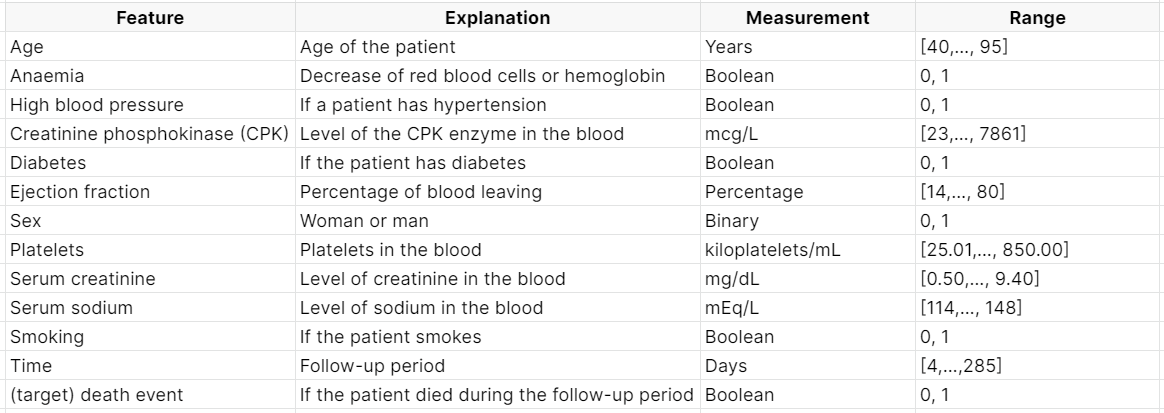

In [3]:
eda = df.copy()

In [4]:
eda.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
eda.rename(columns={"creatinine_phosphokinase":"creatinine","high_blood_pressure":"hbp"},inplace= True)

column rename :
    creatinine_phosphokinase = creatinine
    high_blood_pressure = hbp

In [6]:
eda

,age,anaemia,creatinine,diabetes,ejection_fraction,hbp,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
duplicates = eda[eda.duplicated()] 
duplicates

,age,anaemia,creatinine,diabetes,ejection_fraction,hbp,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


no duplicates found.

In [24]:
eda = eda.replace({    "anaemia": {
        0: "No",
        1: "Yes"
    },
    "diabetes": {
        0: "No",
        1: "Yes",
    },
    "hbp": {
        0: "No",
        1: "Yes"
    },
    "sex": {
        0: "Female",
        1: "Male",
    },
    "smoking": {
        0: "No",
        1: "Yes"
    },
    "death_event": {
        0: "Live",
        1: "Dead",
    }
})

In [25]:
eda

,age,anaemia,creatinine,diabetes,ejection_fraction,hbp,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,1
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,1
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,1
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,1
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,No,61,Yes,38,Yes,155000.00,1.1,143,Male,Yes,270,0
295,55.0,No,1820,No,38,No,270000.00,1.2,139,Female,No,271,0
296,45.0,No,2060,Yes,60,No,742000.00,0.8,138,Female,No,278,0
297,45.0,No,2413,No,38,No,140000.00,1.4,140,Male,Yes,280,0


In [11]:
eda.isnull().sum()

age                  0
anaemia              0
creatinine           0
diabetes             0
ejection_fraction    0
hbp                  0
platelets            0
serum_creatinine     0
serum_sodium         0
sex                  0
smoking              0
time                 0
DEATH_EVENT          0
dtype: int64

In [12]:
eda.head()

,age,anaemia,creatinine,diabetes,ejection_fraction,hbp,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,1,265000.00,1.9,130,Male,No,4,1
1,55.0,No,7861,No,38,0,263358.03,1.1,136,Male,No,6,1
2,65.0,No,146,No,20,0,162000.00,1.3,129,Male,Yes,7,1
3,50.0,Yes,111,No,20,0,210000.00,1.9,137,Male,No,7,1
4,65.0,Yes,160,Yes,20,0,327000.00,2.7,116,Female,No,8,1


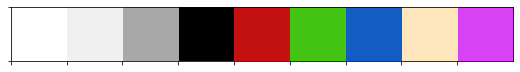

In [13]:
colors = ["#fff", "#f0f0f0", "#a8a8a8", "#000", "#c41212", "#44c412", "#125cc4", "#ffe7bd", "#d742f5"]
WHITE, GREY, DARKGREY, BLACK, RED, GREEN, BLUE, BEIGE, PINK = colors
sns.palplot(colors)

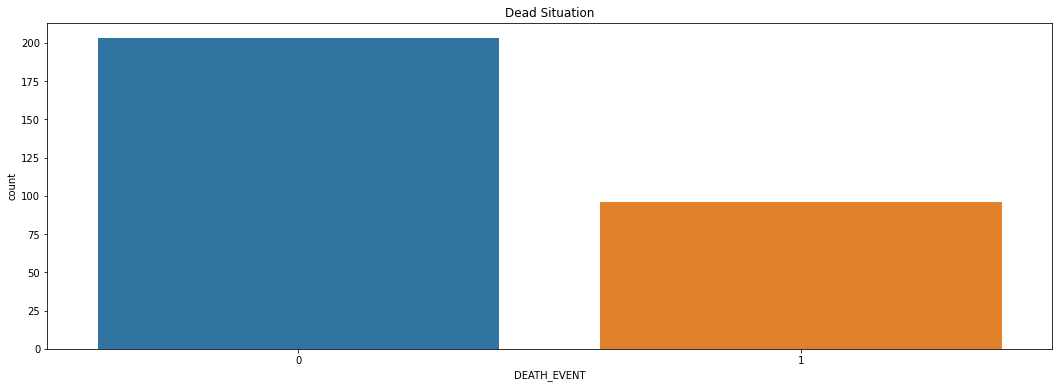

In [28]:
plt.figure(figsize=(18,6))
sns.countplot(x='DEATH_EVENT', data= eda)
plt.title('Dead Situation')
plt.show()

Live: a tad above 200 count


Dead: a tad below 100 count

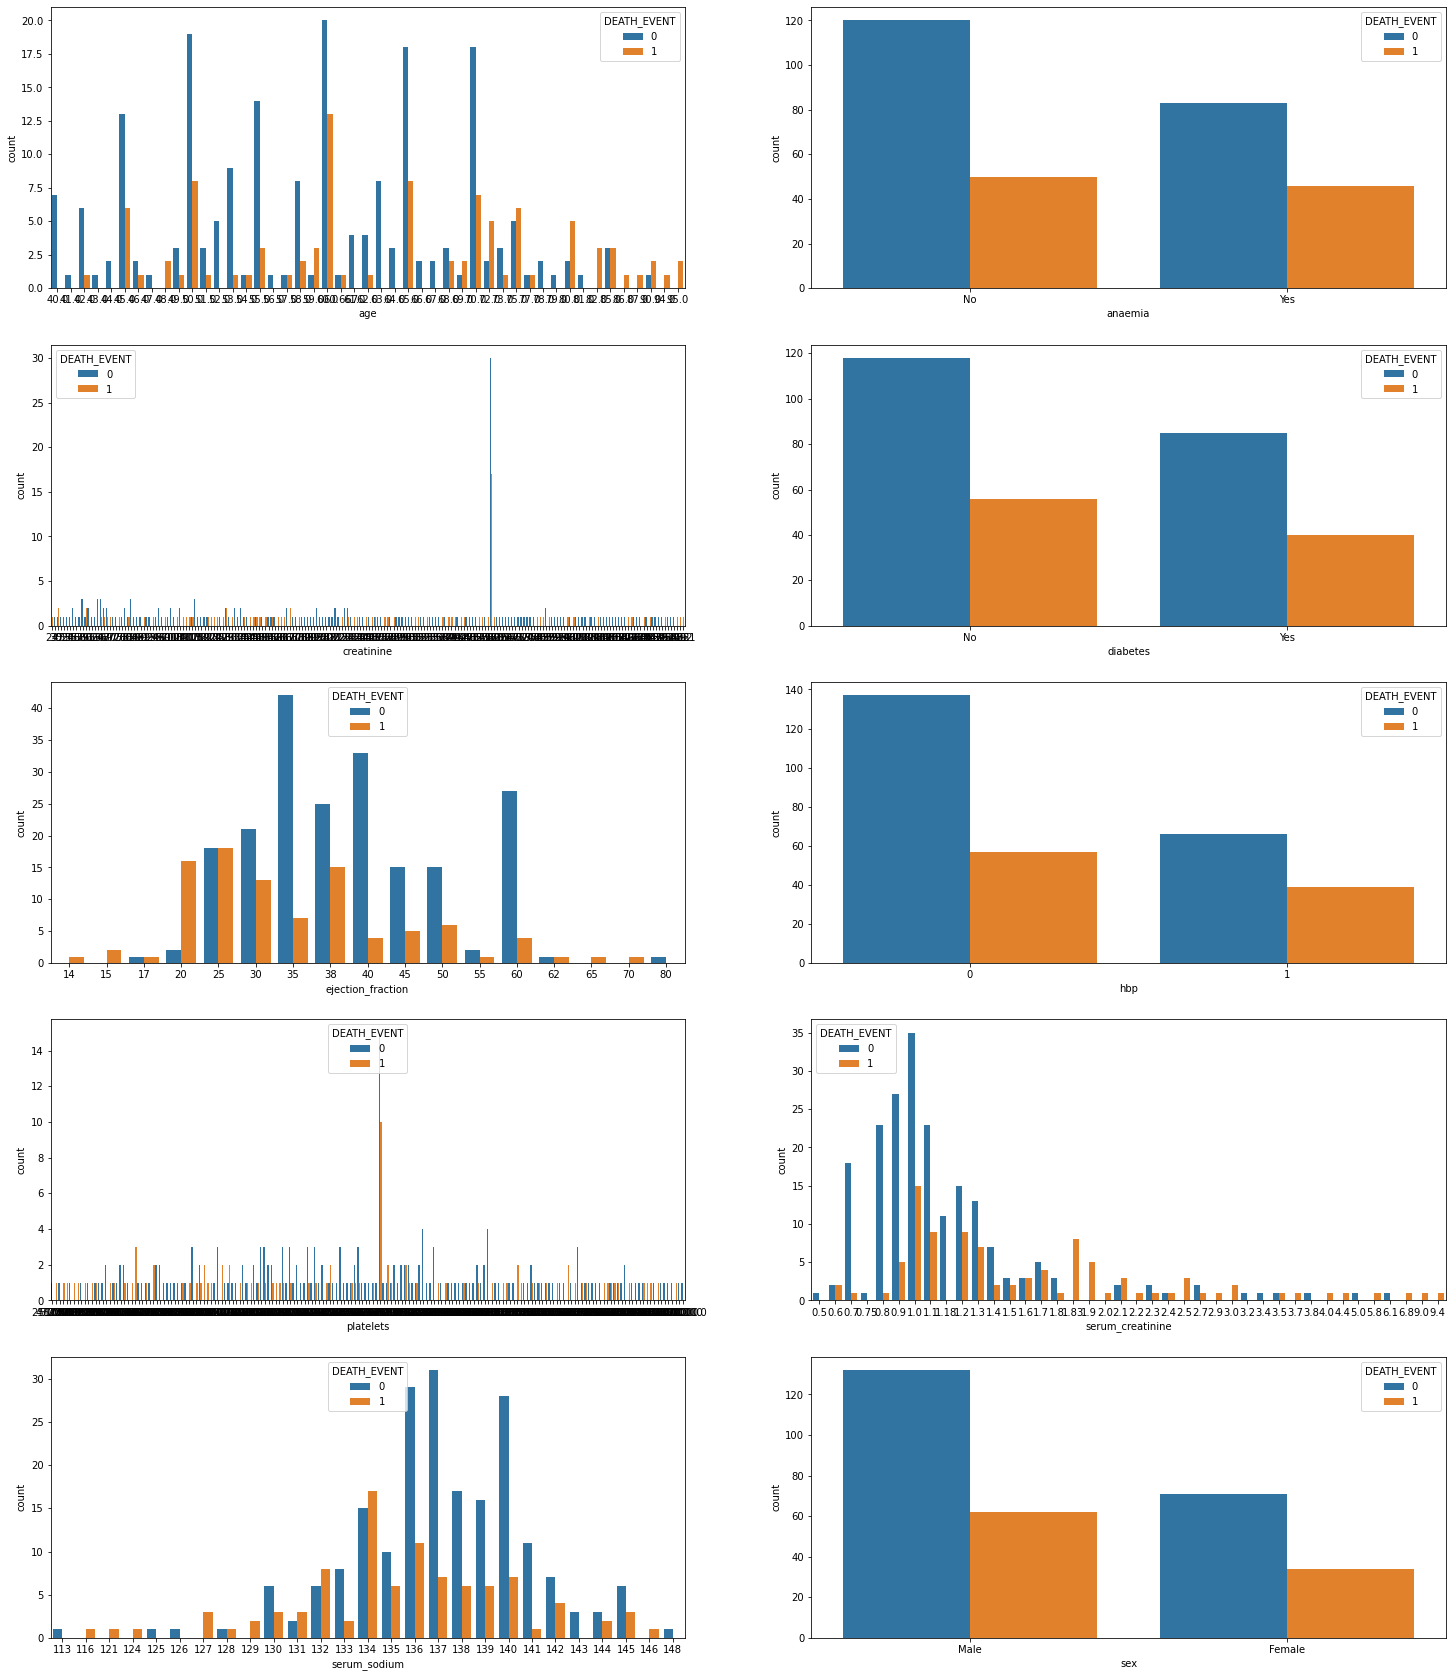

In [15]:
cust_beh= ['age','anaemia','creatinine','diabetes', 'ejection_fraction', 'hbp', 'platelets', 'serum_creatinine','serum_sodium','sex','smoking','time']
fig, axes= plt.subplots(5,2, figsize=(25,30))
for cb, ax in zip(cust_beh, axes.flatten()):
    sns.countplot(cb, data= eda, hue= 'DEATH_EVENT', ax=ax)

In [16]:
def hide_spines(ax, spines=["top", "right", "bottom", "left"]):
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

<ipython-input-17-63db1835489d>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


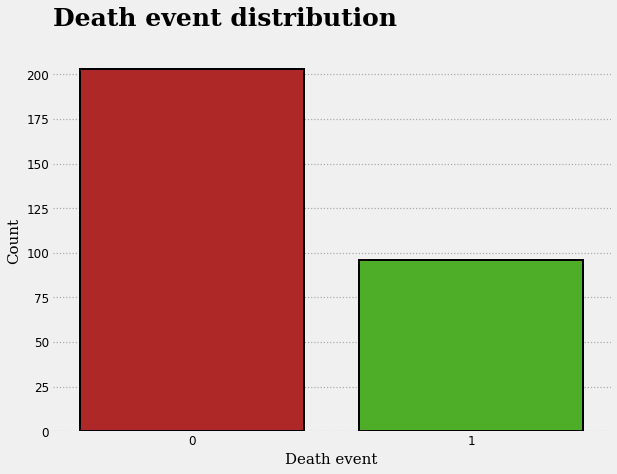

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
fig.set_facecolor(GREY)

ax.set_facecolor(GREY)
ax.grid(axis="y", linewidth=1.2, linestyle=":", zorder=0, color=DARKGREY)

death_event_data = eda["DEATH_EVENT"]
colors_ = [RED, GREEN]
sns.countplot(x=death_event_data, palette=colors_, zorder=2, edgecolor=BLACK, linewidth=2, ax=ax)
ax.set_xlabel(xlabel="Death event", fontsize=15, labelpad=5, fontfamily="serif")
ax.set_ylabel(ylabel="Count", fontsize=15, labelpad=5, fontfamily="serif")
ax.xaxis.set_tick_params(labelsize=12, size=0)
ax.yaxis.set_tick_params(labelsize=12, size=0)
hide_spines(ax)

for idx, patch in enumerate(ax.patches):
    color = colors_[idx]
    patch_x = patch.get_x()
    patch_height = patch.get_height()
    
ax.set_title(label="Death event distribution", fontfamily="serif", fontsize=25, fontweight="bold", loc="left", y=1.05)
fig.show()

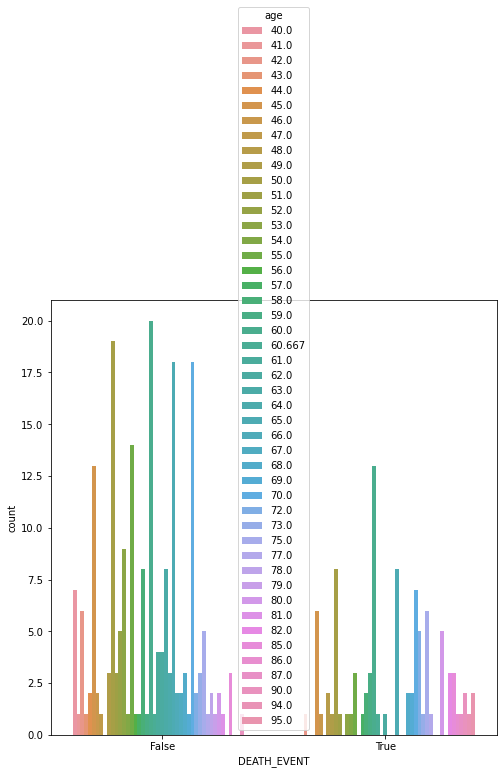

In [18]:

plt.figure(figsize=(8,8))
sns.countplot(eda['DEATH_EVENT']==1, hue= eda['age'] )


Dead Percentage for people that diabetes mark is No :  32.18
Dead Percentage for people that diabetes mark is Yes :  32.0


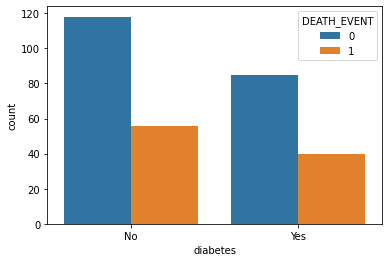

In [30]:
sns.countplot(data = eda, x = eda['diabetes'], hue = eda['DEATH_EVENT'])
for i in eda['diabetes'].unique():
    print(f'Dead Percentage for people that diabetes mark is {i} : ',round(eda[eda['diabetes'] == f'{i}']['DEATH_EVENT'].value_counts()[1]/ len(eda[eda['diabetes'] == f'{i}']['DEATH_EVENT'])*100, 2))

Dead Percentage for people that smoking mark is No :  32.51
Dead Percentage for people that smoking mark is Yes :  31.25


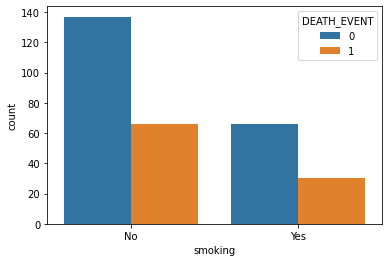

In [32]:
sns.countplot(data = eda, x = eda['smoking'], hue = eda['DEATH_EVENT'])
for i in eda['smoking'].unique():
    print(f'Dead Percentage for people that smoking mark is {i} : ',round(eda[eda['smoking'] == f'{i}']['DEATH_EVENT'].value_counts()[1]/ len(eda[eda['smoking'] == f'{i}']['DEATH_EVENT'])*100, 2))

Dead Percentage for people that anaemia mark is No :  29.41
Dead Percentage for people that anaemia mark is Yes :  35.66


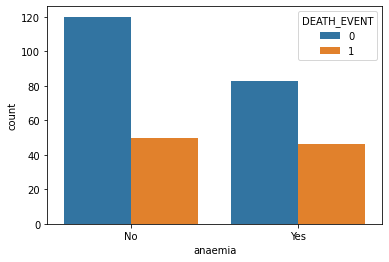

In [33]:
sns.countplot(data = eda, x = eda['anaemia'], hue = eda['DEATH_EVENT'])
for i in eda['anaemia'].unique():
    print(f'Dead Percentage for people that anaemia mark is {i} : ',round(eda[eda['anaemia'] == f'{i}']['DEATH_EVENT'].value_counts()[1]/ len(eda[eda['anaemia'] == f'{i}']['DEATH_EVENT'])*100, 2))

Dead Percentage for people that High Blood Pressure mark is Yes :  37.14
Dead Percentage for people that High Blood Pressure mark is No :  29.38


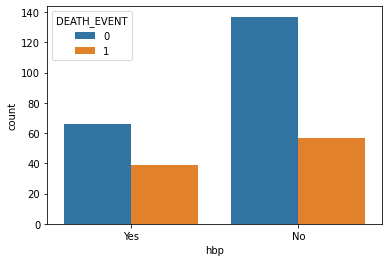

In [34]:
sns.countplot(data = eda, x = eda['hbp'], hue = eda['DEATH_EVENT'])
for i in eda['hbp'].unique():
    print(f'Dead Percentage for people that High Blood Pressure mark is {i} : ',round(eda[eda['hbp'] == f'{i}']['DEATH_EVENT'].value_counts()[1]/ len(eda[eda['hbp'] == f'{i}']['DEATH_EVENT'])*100, 2))

Dead Percentage for people that Male :  31.96
Dead Percentage for people that Female :  32.38


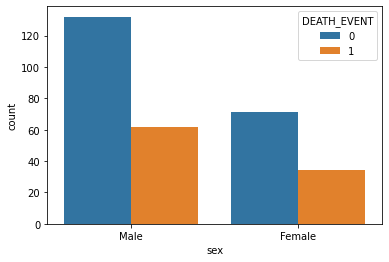

In [27]:
sns.countplot(data = eda, x = eda['sex'], hue = eda['DEATH_EVENT'])
for i in eda['sex'].unique():
    print(f'Dead Percentage for people that {i} : ',round(eda[eda['sex'] == f'{i}']['DEATH_EVENT'].value_counts()[1]/ len(eda[eda['sex'] == f'{i}']['DEATH_EVENT'])*100, 2))

#### What Information we could gathered from this analysis?
    
    The goal of this analysis is to find what factor that could raise the patient's chance of dying caused by heart failure.
    The Sex feature tells us that the difference in gender was not making any effect in having dead by heart failure, and 
    surprisingly the smoking and diabetes feature as well. 
    
    The feature that could represent the high chance of patient's dead caused by heart failure are anaemia and high blood
    pressure. These features could be use to monitor the remaining patients and also establish some prevention.

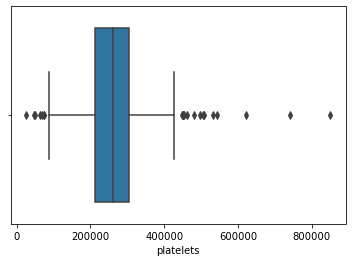

In [43]:
sns.boxplot(data = eda, x = eda['platelets'])

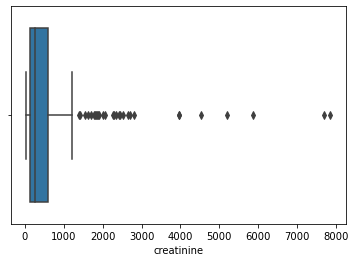

In [44]:
sns.boxplot(data = eda, x = eda['creatinine'])

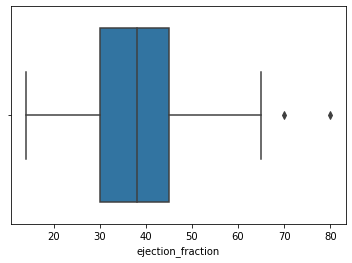

In [45]:
sns.boxplot(data = eda, x = eda['ejection_fraction'])

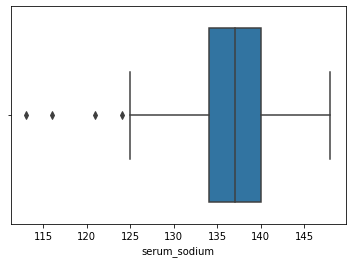

In [46]:
sns.boxplot(data = eda, x = eda['serum_sodium'])

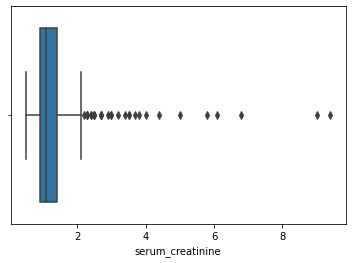

In [47]:
sns.boxplot(data = eda, x = eda['serum_creatinine'])